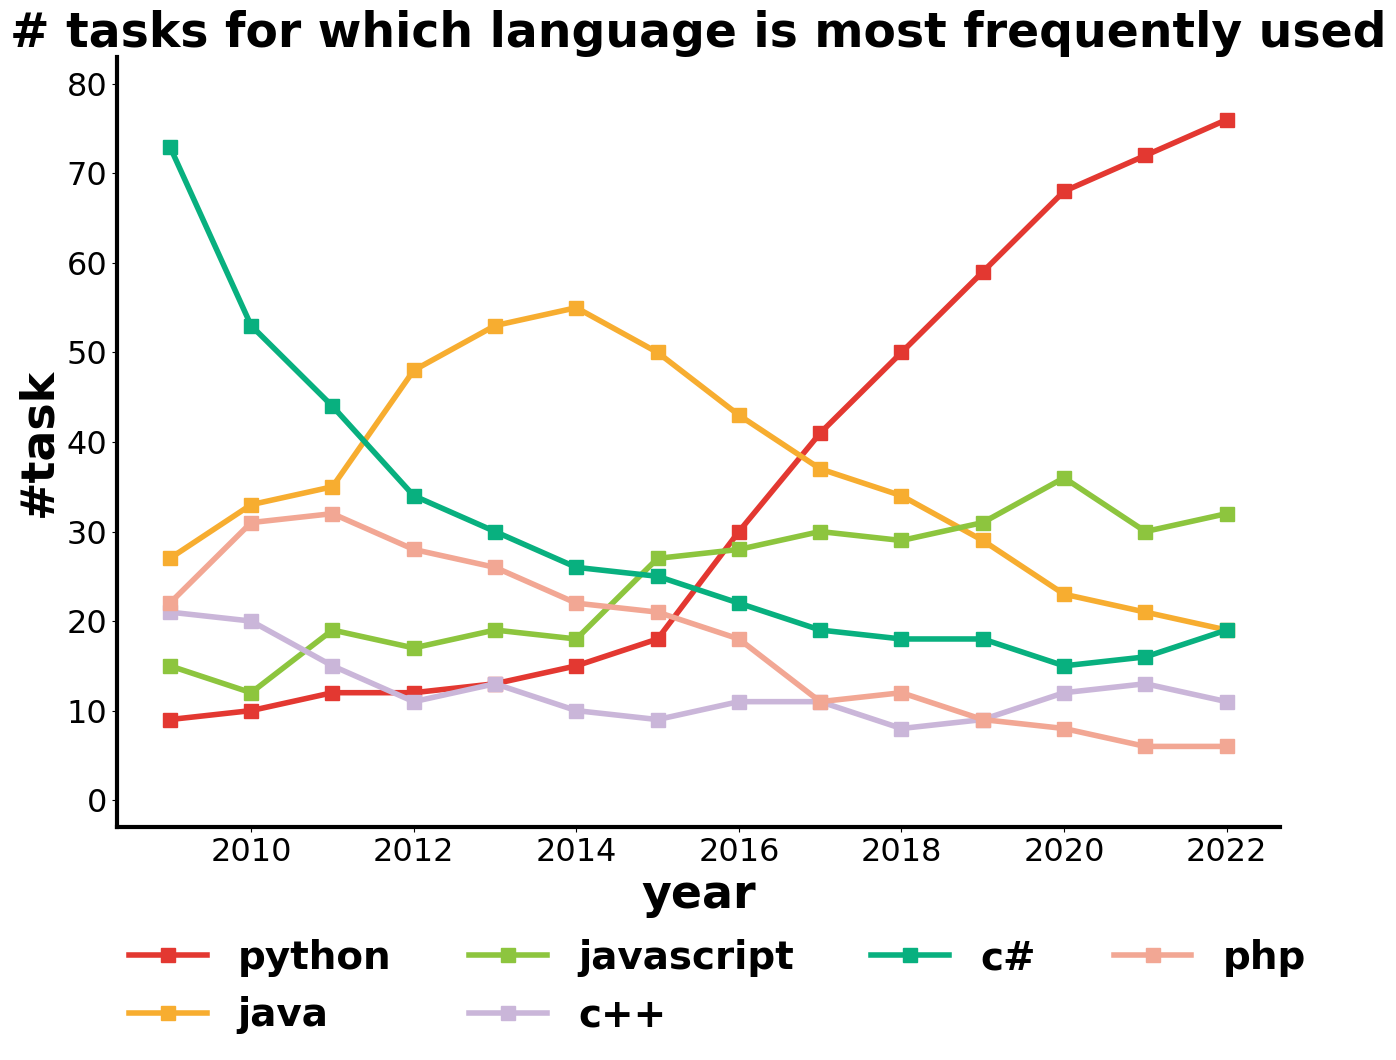

In [1]:
from pickle_file import load_obj
from collections import defaultdict
import numpy as np

data_path = 'data_processing/data_files/task_space_data/'
data_path_save = data_path + 'obj_tag_question_bipartite_core_space/'
level = 1

threshold_user_bool = load_obj('all_threshold_user_bool', data_path_save + f'vote_regression_together/')

level = 1

programming_language_std_adjusted = load_obj('programming_language_std_adjusted', data_path_save)
L_dict = {l:i for i,l in enumerate(programming_language_std_adjusted)}
community_list_core_std = load_obj(f"community_list_std_core_cut_level{level}", data_path_save + 'networks/probability/')
C_dict = {c:i for i,c in enumerate(community_list_core_std)}
community_core_level = load_obj(f"community_core_with_cut_level{level}", data_path_save + 'networks/probability/')

tag_community_dict = {}
for i,c in community_core_level.items():
    for t in c:
        tag_community_dict[t] = i

language_list = ['python', 'java', 'javascript', 'c++', 'c#','php']
language_dict = {l:defaultdict(int) for l in language_list}
for yr in range(2009, 2023):
    
    language_in_task_rank = {l:{t:{} for t in community_list_core_std} for l in language_list}
    tl_uc_matrix = load_obj(f'answer_task_language_user_count_matrix_with_merge_{[yr]}_level_{level}', data_path_save + f'task_language_nestedness/tl_matrix/')
    for t in community_list_core_std:
        l_rank = np.argsort(-tl_uc_matrix[C_dict[t],:])
        for l in language_list:
            if tl_uc_matrix[C_dict[t],L_dict[l]] > 0:
                language_in_task_rank[l][t] = np.where(l_rank == L_dict[l])[0][0] + 1

            else:
                language_in_task_rank[l][t] = -1

    for l, tr_dict in language_in_task_rank.items():
        for t, r in tr_dict.items():
            if r == 1:
                language_dict[l][yr] += 1



import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))


color_yyahn = ['#e33831', '#f7ad30', '#8dc53e', '#cab6d9', '#08b07f', 
            '#f2a794', '#ed643a', '#871918', '#a1d9e8', '#b985ba', 
            '#d5c726', '#508dc4', '#2b2064', '#7d7d7d', '#7852A9', 
            '#1db58f', '#faccbd', '#dc2227', '#609f5c', '#cd6c74', 
            '#f293d1', '#f4a720', '#a08f27']

for l in language_list:
    plt.plot( language_dict[l].keys() , language_dict[l].values() ,'s-', ms = 10, lw=4, c = color_yyahn[language_list.index(l)], label = l)

x_label_name = 'year'
y_label_name = '#task'

plt.xlabel(x_label_name,fontsize=33, weight = 'bold')
plt.ylabel(y_label_name,fontsize=33, weight = 'bold')
plt.title('# tasks for which language is most frequently used', fontsize=34, weight = 'bold')
# ####设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=23)
plt.rc('font', weight='bold')
#plt.legend()
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
ax=plt.gca();#获得坐标轴的句柄
ax.spines['bottom'].set_linewidth(3);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(3);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(0);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(0);####设置上部坐标轴的粗细
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.ylim([-3,83])
#plt.xlim([0,4])
#plt.xticks([1,3],['Fixed Effect: Year','Fixed Effect: Year + Task'])
#plt.yticks([0.01, 0.013, 0.015],[0.010, 0.013,0.015])
#plt.xticks(np.arange(0,24,1))
# 设置 X 轴的网格线，风格为 点画线
#plt.grid(axis='x',linestyle='-.')

font1 = {
        'weight' : 'bold',
        'size'   : 28,
}
legend = plt.legend(prop=font1, frameon = False, bbox_to_anchor=(-0.02, -0.1), loc='upper left',ncol = 4)

#plt.savefig('output/figure_4b.svg', format = 'svg', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()